## Eigenvector centrality

Question: How did eigenvector centrality get its name?



In [105]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns

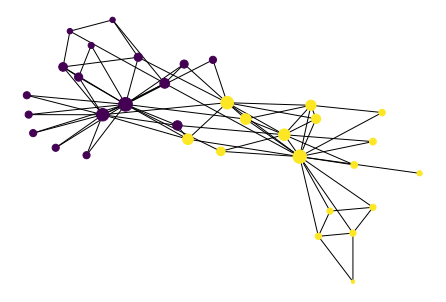

In [210]:
# use the "karate club" graph

kc = nx.karate_club_graph()
kc_info = pd.DataFrame({'clubs': [kc.nodes[i]['club'] for i in kc.nodes]})
kc_info['club_color'] = (kc_info['clubs'] == 'Mr. Hi').astype(int)
kc_ec = nx.eigenvector_centrality(kc)
kc_info['ec'] = np.array([kc_ec[i] for i in kc_ec])

# draw with size proportional to eigvenctor centrality
scaling=500
layout = nx.spring_layout(kc)
nx.draw(kc, pos=layout,node_size=kc_info['ec']*scaling, node_color=kc_info['club_color'])

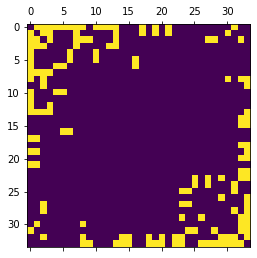

In [16]:
# get adjacency for KC network

kc_adj = nx.to_numpy_array(kc)
plt.matshow(kc_adj)

A relative centrality measure $x_v$ for vertex $v$ can be created according to the following equation:

$$
x_v = \frac{1}{\lambda}\sum_{t \in G}{a_{v,t}*x_t}
$$

where $a$ is the adjacency matrix for the graph $G$ and $\lambda$ is a constant.  That is, a nodes relatively centrality is the sum of all of its neighbors centralities.  It turns out that this can be written in matrix form as:

$$
Ax = \lambda x
$$

which is simply the eigenvector equation (where $\lambda$ are the eigenvalues).

In [30]:
eigvals, eigvecs = np.linalg.eig(kc_adj)
# the results have very tiny imaginary parts - get rid of those
eigvals = np.real(eigvals)
eigvecs = np.real(eigvecs)


The eigenvector centrality measure is simply the magnitude of the largest eigenvector.

In [200]:
largest_eigvec = eigvecs[:, np.argmax(eigvals)]
np.corrcoef(largest_eigvec, kc_info['ec'])

array([[1., 1.],
       [1., 1.]])

## Estimating centralities

Question: Are there efficient methods to numerically estimate the centrality measures (for instance betweenness centrality)? Or do we have to combinatorially find all paths?


To address this, first let's generate a large network and see how long it takes to compute each kind of centrality.

### Betweeness centrality

Betweeness centrality is a measure of the proportion of shortest paths between all nodes that pass through a given nodes. This requires computation of all shortest paths, so let's first see how long that takes. 

In [172]:
start = time.time()
sp = dict(nx.all_pairs_shortest_path(kc))
print('Elapsed time (secs):', time.time() - start)



Elapsed time (secs): 0.0068950653076171875


In [170]:
p = 0.1
shortest_path_time = pd.DataFrame({'n': [i for i in range(10, 1020, 20)]})

for i in shortest_path_time.index:
    Gsim = nx.fast_gnp_random_graph(shortest_path_time.loc[i, 'n'], p)
    start = time.time()
    _ = dict(nx.all_pairs_shortest_path(Gsim))
    shortest_path_time.loc[i, 'et'] = time.time() - start
    

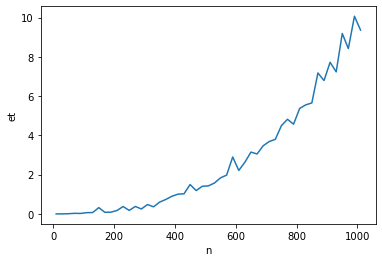

In [171]:
sns.lineplot('n', 'et', data=shortest_path_time)

0.012003183364868164


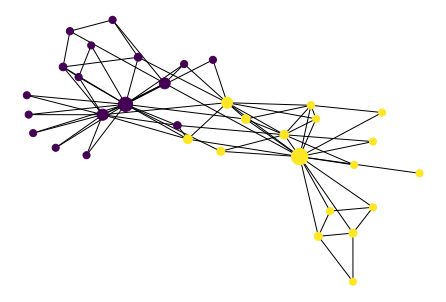

In [211]:
start = time.time()
bc = nx.betweenness_centrality(kc)
print(time.time() - start)

kc_info['bc'] = np.array([bc[i] for i in bc])
nx.draw(kc, pos=layout,node_size=kc_info['bc']*scaling + 50, node_color=kc_info['club_color'])

### Degree centrality

Degree centrality is simply the degree of each node.

0.00021719932556152344


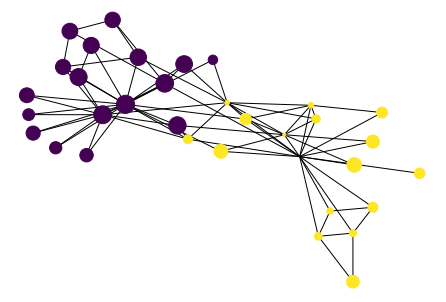

In [212]:
start = time.time()
dc = list(nx.degree_centrality(kc))
print(time.time() - start)

dc_vec = np.array([dc[i] for i in dc])
scaling=10
nx.draw(kc, pos=layout,node_size=dc_vec*scaling, node_color=kc_info['club_color'])

### Closeness centrality

Closeness centrality is the total distance from a node to all other nodes via the shortest path.

0.014991998672485352


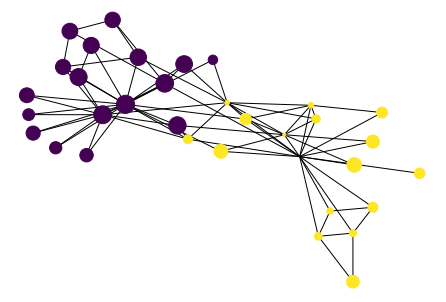

In [214]:
start = time.time()
cc = list(nx.closeness_centrality(kc))
print(time.time() - start)

cc_vec = np.array([cc[i] for i in cc])
nx.draw(kc, pos=layout,node_size=cc_vec*scaling, node_color=kc_info['club_color'])